credit: https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8

In [20]:
import numpy as np
import cvxopt          # pip install cvxopt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

CVXOPT is a free software package for convex optimization based on the Python programming language. It can be used with the interactive Python interpreter, on the command line by executing Python scripts, or integrated in other software via Python extension modules.

In [21]:
class SVM:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # P = X^T X
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])
                
        P = cvxopt.matrix(np.outer(y, y) * K)
        # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        # A = y^T 
        A = cvxopt.matrix(y, (1, n_samples))
        # b = 0 
        b = cvxopt.matrix(0.0)
        # -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        # 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
    
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
# Lagrange multipliers
        a = np.ravel(solution['x']) #將解答展開成一序列
# Lagrange have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
# Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)
# Weights
        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        
    def project(self, X):
        return np.dot(X, self.w) + self.b
    
    
    def predict(self, X):
        return np.sign(self.project(X))

In [22]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
#y = np.where(y == 0, -1, 1)

In [23]:
# X, y = datasets.make_blobs(n_samples=250, centers=2, random_state=0, cluster_std=0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

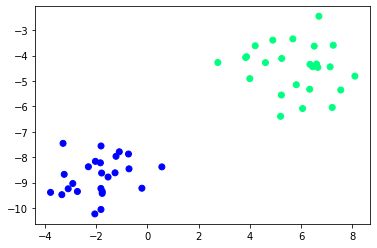

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
svm = SVM()
svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.9445e+00 -2.9959e+00  8e+01  8e+00  2e+00
 1: -7.0986e-01 -2.8801e-01  8e+00  8e-01  1e-01
 2: -1.8884e-02 -1.6902e-01  3e-01  2e-02  4e-03
 3: -4.0437e-02 -8.5378e-02  4e-02  1e-17  6e-16
 4: -5.6300e-02 -6.9364e-02  1e-02  4e-18  5e-16
 5: -6.5131e-02 -6.8722e-02  4e-03  1e-17  9e-16
 6: -6.7878e-02 -6.7978e-02  1e-04  3e-17  1e-15
 7: -6.7955e-02 -6.7956e-02  1e-06  2e-17  7e-16
 8: -6.7956e-02 -6.7956e-02  1e-08  2e-17  9e-16
Optimal solution found.


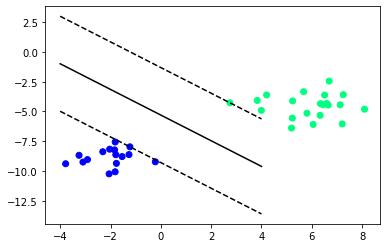

In [27]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')
# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')
# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

In [28]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[9, 0],
       [0, 4]], dtype=int64)

In [29]:
# Let’s attempt the same thing using the scikit-learn implementation of the support vector classifier.
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

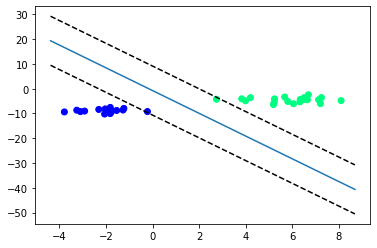

In [30]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

In [ ]:
# The following are tests

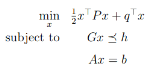

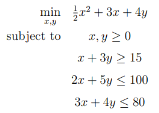

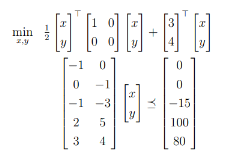

In [31]:
from cvxopt import matrix
P = matrix([[1.0,0.0],[0.0,0.0]])
q = matrix([3.0,4.0])
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],[0.0,-1.0,-3.0,5.0,4.0]])
h = matrix([0.0,0.0,-15.0,100.0,80.0])

An alternative way, perhaps more convenient if you are familiar with NumPy, is to first
create the matrices in NumPy, then call the CVXOPT matrix constructor on them:

In [33]:
import numpy
from cvxopt import matrix
P = matrix(numpy.diag([1,0]), tc='d')
q = matrix(numpy.array([3,4]), tc='d')
G = matrix(numpy.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]]), tc='d')
h = matrix(numpy.array([0,0,-15,100,80]), tc='d')

In [34]:
from cvxopt import solvers
sol = solvers.qp(P,q,G,h) # If you had A, b as well, you would call: sol = solvers.qp(P,q,G,h,A,b)

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  0e+00  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  1e-16  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  3e-18  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  9e-17  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  3e-16  7e-17
 6:  2.0062e+01  1.9974e+01  9e-02  9e-17  7e-17
 7:  2.0001e+01  2.0000e+01  9e-04  6e-17  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  9e-17  4e-16
Optimal solution found.


In [37]:
# Extract optimal value and solution
sol['x'] # [7.13e-07, 5.00e+00]

<2x1 matrix, tc='d'>

In [38]:
sol['primal objective'] # 20.0000061731

20.00000617311241